In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("ass2.pickle")

train = data['train']
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

dev = data['dev']
X_dev = dev.iloc[:, :-1].values
y_dev = dev.iloc[:, -1].values

test = data['test']
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

the number of samples in the train dataset is:  40533
the dimension (or features) of each data sample is:  42
the mean value of the mean fetures values of the train dataset is: 0.286
the variance is: 0.395
the data is not balanced. for the training data : (array([0, 1, 2], dtype=int64), array([ 3917,  9882, 26734], dtype=int64))
heres an example of some data sample:


<Figure size 640x480 with 0 Axes>

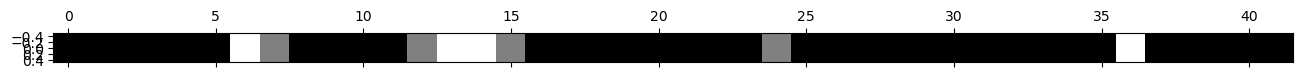

with label: 2


In [5]:
# preliminary data analysis
print("the number of samples in the train dataset is: ", X_train.shape[0])
print("the dimension (or features) of each data sample is: ", X_train.shape[1])
print("the mean value of the mean fetures values of the train dataset is: {:.3f}".format(np.mean(X_train)))
print("the variance is: {:.3f}".format(np.var(X_train)))
print("the data is not balanced. for the training data : {}". format(np.unique(y_train, return_counts=True)))
print("heres an example of some data sample:")

num = 1
img = X_train[num].reshape(1,42)
plt.gray()
plt.matshow(img)
plt.show()

print("with label: {}".format(y_train[num]))

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [21]:
def split_train_eval(classifier, X_train, y_train, X_dev, y_dev):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_dev)
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate the misclassification
    print("The accuracy is: {:.3f}".format(accuracy))

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
split_train_eval(classifier, X_train, y_train, X_dev, y_dev)

The accuracy is: 0.638


In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)
split_train_eval(classifier, X_train, y_train, X_dev, y_dev)

C:\Users\paney\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy is: 0.570


In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
split_train_eval(classifier, X_train, y_train, X_dev, y_dev)

The accuracy is: 0.656


In [28]:
classifier = SVC(kernel = 'rbf', random_state = 0)
split_train_eval(classifier, X_train, y_train, X_dev, y_dev)

The accuracy is: 0.509


In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
split_train_eval(classifier, X_train, y_train, X_dev, y_dev)

The accuracy is: 0.585


In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
split_train_eval(classifier, X_train, y_train, X_dev, y_dev)

The accuracy is: 0.409


In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
split_train_eval(classifier, X_train, y_train, X_dev, y_dev)

The accuracy is: 0.490
